### **像素距离与连通域**

* 图像形态学用于从图像中提取对于**描述区域形状**有意义的图像分量，重点关注图像的物体区域信息，忽略部分纹理信息，常转化为二值化图像处理

* 图像中两个像素之间的距离有多种定义方式，常用的有欧氏距离、街区距离和棋盘距离

* 欧氏距离是两个像素的直线距离，表示从一个像素到一个像素的最短距离，会出现小数$$d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2} $$

* 街区距离表示两个像素在x方向和y方向的距离之和，图像中两个像素值之间的距离一定为整数$$d=\sqrt{\left | x_1-x_2 \right | +\left | y_1-y_2 \right |} $$

* 棋盘距离表示两个像素在x方向距离和y方向距离的最大值，一定为整数$$d=max ( \left | x_1-x_2 \right | , \left | y_1-y_2 \right |) $$

* cv.distanceTransformWithLabels()用于实现距离变换，即统计图像中所有像素距离零像素的最短距离，并将距离变换后的图像对应的标签像素组通过值返回；第3个掩模尺寸，可以选择的尺寸为cv.DIST_MASK_3和cv.DIST_MASK_5：
  * 当使用街区距离时，掩模尺寸无影响
  * 当使用欧氏距离时，3 × 3 粗略计算两个像素值之间的距离，5 × 5 精确计算两个像素值之间的距离，一般使用5 × 5 掩模
  * 当使用棋盘距离时，掩模尺寸无影响
* 该函数的可选参数有：
  * cv.DIST_USER 自定义距离
  * cv.DIST_L1 街区距离 $d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2} $
  * cv.DIST_L2 欧氏距离 $d=\sqrt{\left | x_1-x_2 \right | +\left | y_1-y_2 \right |}$
  * cv.DIST_C 棋盘距离 $d=max ( \left | x_1-x_2 \right | , \left | y_1-y_2 \right |)$
  * cv.DIST_LABEL_CCOMP 每个连接的零像素都分配为相同的标签
  * cv.DIST_LABEL_PIXEL 每个连接的零像素都有自己的标签

* cv.distanceTransformWithLabels()函数在进行距离变换时会生成Voronoi图，但有时只需要实现距离变换，不需要生成Voronoi图，可使用cv.distanceTransform()函数，该函数取消了生成Voronoi图，只输出距离变换后的图像

* 图像中零像素表示黑色，为了清楚观察变换后的结果，不建议使用**距离过小**或**黑色区域较多**的图像

In [34]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [35]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'rice.png', cv.IMREAD_GRAYSCALE)
if img is None:
    print('Failed to read rice.png')
    sys.exit

In [36]:
# 创建矩阵，用于求像素之间的距离
array = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]],dtype='uint8')
# 分别计算街区距离，欧氏距离和棋盘距离
dst_L1 = cv.distanceTransform(array, cv.DIST_L1, cv.DIST_MASK_3)
dst_L2 = cv.distanceTransform(array, cv.DIST_L2, cv.DIST_MASK_5)
dst_C = cv.distanceTransform(array, cv.DIST_C, cv.DIST_MASK_3)

In [37]:
# 将图像转换为二值图像，同时将黑白区域互换
# 二值化的阈值设置为50
rice_BW = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
rice_BW_INV = cv.threshold(img, 50, 255, cv.THRESH_BINARY_INV)

In [38]:
# 进行图像的距离变换
dst_rice_BW = cv.distanceTransform(rice_BW[1], 1, 3, dstType=cv.CV_32F)
dst_rice_BW_INV = cv.distanceTransform(rice_BW_INV[1], 1, 3, dstType=cv.CV_32F)

In [39]:
# 展示矩阵距离计算结果
print('街区距离：\n{}'.format(dst_L1))
print('欧式距离：\n{}'.format(dst_L2))
print('棋盘距离：\n{}'.format(dst_C))

街区距离：
[[4. 3. 2. 3. 4.]
 [3. 2. 1. 2. 3.]
 [2. 1. 0. 1. 2.]
 [3. 2. 1. 2. 3.]
 [4. 3. 2. 3. 4.]]
欧式距离：
[[2.7999878 2.1968994 2.        2.1968994 2.7999878]
 [2.1968994 1.3999939 1.        1.3999939 2.1968994]
 [2.        1.        0.        1.        2.       ]
 [2.1968994 1.3999939 1.        1.3999939 2.1968994]
 [2.7999878 2.1968994 2.        2.1968994 2.7999878]]
棋盘距离：
[[2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 2.]
 [2. 1. 0. 1. 2.]
 [2. 1. 1. 1. 2.]
 [2. 2. 2. 2. 2.]]


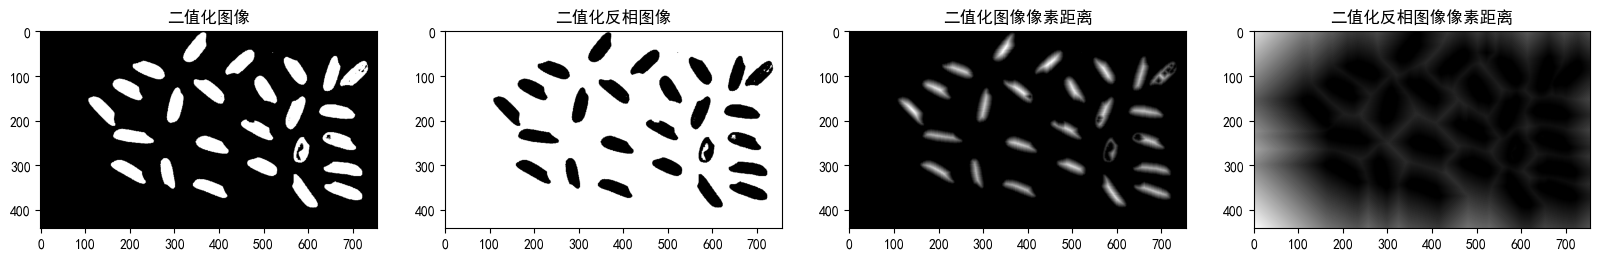

In [40]:
# 展示二值化、黑白互换后的图像及距离变化结果
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.title('二值化图像')
plt.imshow(rice_BW[1], cmap='gray')
plt.subplot(1, 4, 2)
plt.title('二值化反相图像')
plt.imshow(rice_BW_INV[1], cmap='gray')
plt.subplot(1, 4, 3)
plt.title('二值化图像像素距离')
plt.imshow(dst_rice_BW, cmap='gray')
plt.subplot(1, 4, 4)
plt.title('二值化反相图像像素距离')
plt.imshow(dst_rice_BW_INV, cmap='gray')